In [1]:
# Import libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
# Load the dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
#Due to 10,000 most recent words restriction, no word index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

In [7]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# training data
x_train = vectorize_sequences(train_data)
# test data
x_test = vectorize_sequences(test_data)

In [9]:
# sample train data
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
#The Keras implementation
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5865 - binary_accuracy: 0.6990 - val_loss: 0.3790 - val_binary_accuracy: 0.8530
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3030 - binary_accuracy: 0.9044 - val_loss: 0.3399 - val_binary_accuracy: 0.8591
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2157 - binary_accuracy: 0.9306 - val_loss: 0.2752 - val_binary_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1651 - binary_accuracy: 0.9485 - val_loss: 0.2788 - val_binary_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1314 - binary_accuracy: 0.9620 - val_loss: 0.2920 - val_binary_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1073 - binary_accuracy: 0.9702 - val_loss: 0.3125 - val_binary_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

In [16]:
history_dict = history.history
history_dict.keys()
print(history_dict)

{'loss': [0.5033555626869202, 0.29070669412612915, 0.21210213005542755, 0.16825592517852783, 0.13510774075984955, 0.11209958046674728, 0.09141912311315536, 0.07438291609287262, 0.06497854739427567, 0.0515168271958828, 0.040581587702035904, 0.032302841544151306, 0.02977747842669487, 0.018074506893754005, 0.016677146777510643, 0.013341815210878849, 0.012359743937849998, 0.00534402159973979, 0.007719845976680517, 0.0031530812848359346], 'binary_accuracy': [0.7892000079154968, 0.9038666486740112, 0.9296000003814697, 0.9441999793052673, 0.9571333527565002, 0.9649999737739563, 0.9732666611671448, 0.9790666699409485, 0.9821333289146423, 0.9878000020980835, 0.9904000163078308, 0.9936666488647461, 0.9926666617393494, 0.9977999925613403, 0.9973999857902527, 0.9980666637420654, 0.9975333213806152, 0.9998000264167786, 0.9986000061035156, 0.9998666644096375], 'val_loss': [0.3790132403373718, 0.3398890793323517, 0.2751680314540863, 0.2788076102733612, 0.2919768691062927, 0.31251195073127747, 0.31692

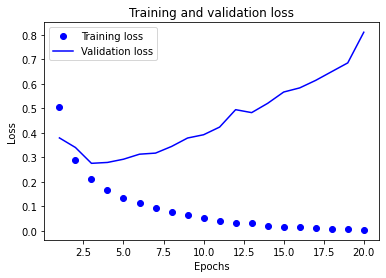

In [17]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

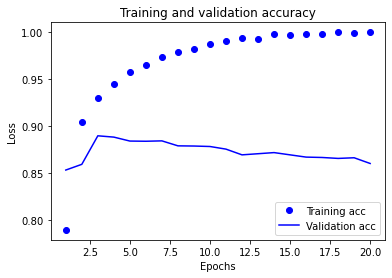

In [18]:
plt.clf() # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5476 - accuracy: 0.7397
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2770 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2000 - accuracy: 0.9352
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8832


In [20]:
results

[0.2951664924621582, 0.8831599950790405]

In [21]:
model.predict(x_test)

array([[0.23139662],
       [0.9994018 ],
       [0.8796495 ],
       ...,
       [0.16537431],
       [0.08784682],
       [0.63191855]], dtype=float32)